In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from preprocessing import merge_chembl_papyrus_mutants
from annotation import chembl_annotation
from mutant_analysis_family import obtain_chembl_family,group_families,link_bioactivity_to_family,\
    plot_circular_barplot_families,plot_circular_barplot_families_newannotations

In [3]:
output_dir = 'C:\\Users\gorostiolam\Documents\Gorostiola Gonzalez, ' \
             'Marina\PROJECTS\\6_Mutants_PCM\DATA\\2_Analysis\\0_mutant_statistics\\0_family_stats'

Obtain family level annotations from ChEMBL

In [4]:
chembl_families = obtain_chembl_family(chembl_version='31')
chembl_families

,accession,l1,l2,l3,l4,l5
0,Q8HZ64,Membrane receptor,Family A G protein-coupled receptor,Small molecule receptor (family A GPCR),Monoamine receptor,Trace amine receptor
1,P50282,Enzyme,Protease,Metallo protease,Metallo protease MAM clan,Metallo protease M10A subfamily
2,P26664,Enzyme,Protease,Serine protease,Serine protease PA clan,Serine protease S29 family
3,P51675,Membrane receptor,Family A G protein-coupled receptor,Peptide receptor (family A GPCR),Chemokine receptor,CC chemokine receptor
4,O15528,Enzyme,Cytochrome P450,Cytochrome P450 family 27,Cytochrome P450 family 27B,Cytochrome P450 27B1
...,...,...,...,...,...,...
10841,Q6V0L0,NaN,NaN,NaN,NaN,NaN
10842,Q6NT55,NaN,NaN,NaN,NaN,NaN
10843,Q4G0S4,NaN,NaN,NaN,NaN,NaN
10844,P09688,NaN,NaN,NaN,NaN,NaN


In [5]:
# Group smaller families in bigger families to avoid cluttering the plot
chembl_families = group_families(chembl_families)
chembl_families

,accession,l1,l2,l3,l4,l5
0,Q8HZ64,Membrane receptor,GPCR,Small molecule receptor (family A GPCR),Monoamine receptor,Trace amine receptor
1,P50282,Enzyme,Protease,Metallo protease,Metallo protease MAM clan,Metallo protease M10A subfamily
2,P26664,Enzyme,Protease,Serine protease,Serine protease PA clan,Serine protease S29 family
3,P51675,Membrane receptor,GPCR,Peptide receptor (family A GPCR),Chemokine receptor,CC chemokine receptor
4,O15528,Enzyme,Cytochrome P450,Cytochrome P450 family 27,Cytochrome P450 family 27B,Cytochrome P450 27B1
...,...,...,...,...,...,...
10841,Q6V0L0,Other,Other,Other,Other,Other
10842,Q6NT55,Other,Other,Other,Other,Other
10843,Q4G0S4,Other,Other,Other,Other,Other
10844,P09688,Other,Other,Other,Other,Other


### Analysis of mutant data availability per family
#### ChEMBL + Papyrus, at least one variant defined

Read and annotate bioactivity data

In [6]:
# Read annotated bioactivity data with mutants (ChEMBL + Papyrus, at least one variant defined per target)
annotated_data = merge_chembl_papyrus_mutants('31', '05.5', 'nostereo', 1_000_000)
# Add family annotations
annotated_data_families = link_bioactivity_to_family(annotated_data, chembl_families)
annotated_data_families

,target_id,connectivity,pchembl_value_Mean,Activity_class_consensus,source,SMILES,CID,accession,sequence,Year,UniProtID,Organism,HGNC_symbol,l1,l2,l3,l4,l5
0,A0A045ISB3_F161S,ALIJNJWQOZKBPP,5.07,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2)cc1,CHEMBL4637459,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN,Enzyme,Hydrolase,Other,Other,Other
1,A0A045ISB3_F161S,CXXIUJZSLPZZIM,5.27,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2Cl)cc1,CHEMBL4647367,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN,Enzyme,Hydrolase,Other,Other,Other
2,A0A045ISB3_F161S,IPTNWUSXZLVWFT,5.04,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2F)cc1,CHEMBL4638011,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN,Enzyme,Hydrolase,Other,Other,Other
3,A0A045ISB3_F161S,LUVQLVJTOZVLDB,5.13,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2Br)cc1,CHEMBL4637373,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN,Enzyme,Hydrolase,Other,Other,Other
4,A0A045ISB3_I203A,ALIJNJWQOZKBPP,7.37,"Series([], dtype: object)",ChEMBL31,O=C(O)C(=O)Nc1ccc(C#Cc2ccc(C(F)(F)F)cc2)cc1,CHEMBL4637459,A0A045ISB3,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,2020.0,A0A045ISB3_MYCTX,Mycobacterium tuberculosis,NaN,Enzyme,Hydrolase,Other,Other,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620016,Q9YQ12_WT,ZYLARFCKPNSSDA,6.17,"Series([], dtype: object)",ChEMBL31,CC(C)[C@H](NC(=O)COc1ccccc1)C(=O)N[C@@H](Cc1cc...,CHEMBL3331342,Q9YQ12,PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,2014.0,Q9YQ12_9HIV1,Human immunodeficiency virus 1,NaN,Enzyme,Protease,Cysteine protease,Cysteine protease PAC clan,Cysteine protease C3A subfamily
620017,Q9YQ12_WT,ZYLFWZWRSRMGBQ,10.10,"Series([], dtype: object)",ChEMBL31,Nc1cccc(CN2C(=O)N(Cc3ccc4cn[nH]c4c3)C(Cc3ccccc...,CHEMBL2296983,Q9YQ12,PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,2013.0,Q9YQ12_9HIV1,Human immunodeficiency virus 1,NaN,Enzyme,Protease,Cysteine protease,Cysteine protease PAC clan,Cysteine protease C3A subfamily
620018,Q9YQ12_WT,ZZCUJLFFPCGLAL,5.51,"Series([], dtype: object)",ChEMBL31,CC1(C)CC[C@]2(C(=O)NCCCCCC(=O)NCC(=O)O)CC[C@]3...,CHEMBL4530451,Q9YQ12,PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,2019.0,Q9YQ12_9HIV1,Human immunodeficiency virus 1,NaN,Enzyme,Protease,Cysteine protease,Cysteine protease PAC clan,Cysteine protease C3A subfamily
620019,Q9YQ12_WT,ZZGMOZUZSAJAML,6.26,"Series([], dtype: object)",ChEMBL31,CC(C)c1nc(CN(C(=O)N[C@H](C(=O)N[C@H](CC[C@H](C...,CHEMBL3115161,Q9YQ12,PQITLWQRPFVTIKIEGQLKEALLDTGADDTVLEEMNLPGRWKPKM...,2014.0,Q9YQ12_9HIV1,Human immunodeficiency virus 1,NaN,Enzyme,Protease,Cysteine protease,Cysteine protease PAC clan,Cysteine protease C3A subfamily


Plot circular barplots for family levels of interest

                      activity_mut  activity_all  mut_ratio
l1                                                         
Enzyme                       20637        360663   0.057220
Epigenetic regulator          1015         76898   0.013199
Ion channel                    179         16606   0.010779
Membrane receptor             1736         88871   0.019534
Other                          552         11181   0.049369
Transcription factor           413         37355   0.011056
Transporter                    156         28447   0.005484


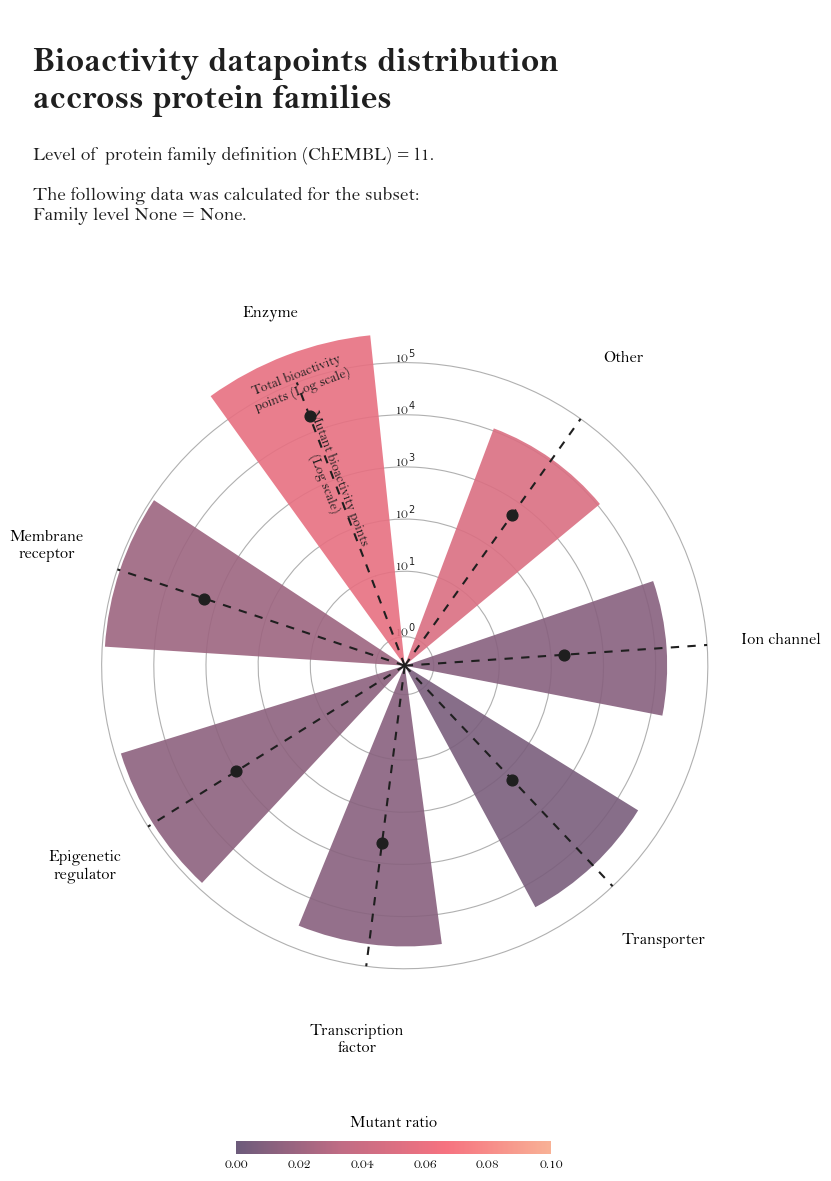

In [7]:
plot_circular_barplot_families(annotated_data_families, 'l1', output_dir, subset_level=None, subset_family=None,
                               save=False)

                             activity_mut  activity_all  mut_ratio
l2                                                                
Cytochrome P450                        22         11122   0.001978
Electrochemical transporter           142          9546   0.014875
Eraser                                 21         14532   0.001445
GPCR                                 1736         88871   0.019534
Hydrolase                            3135         15870   0.197543
Kinase                              12111        135204   0.089576
Ligand-gated ion channel               20          3985   0.005019
Lyase                                  48          7237   0.006633
Nuclear receptor                      327         18767   0.017424
Other                                1918         76321   0.025131
Oxidoreductase                       2831         91169   0.031052
Phosphatase                            67          5135   0.013048
Phosphodiesterase                     236         22969   0.01

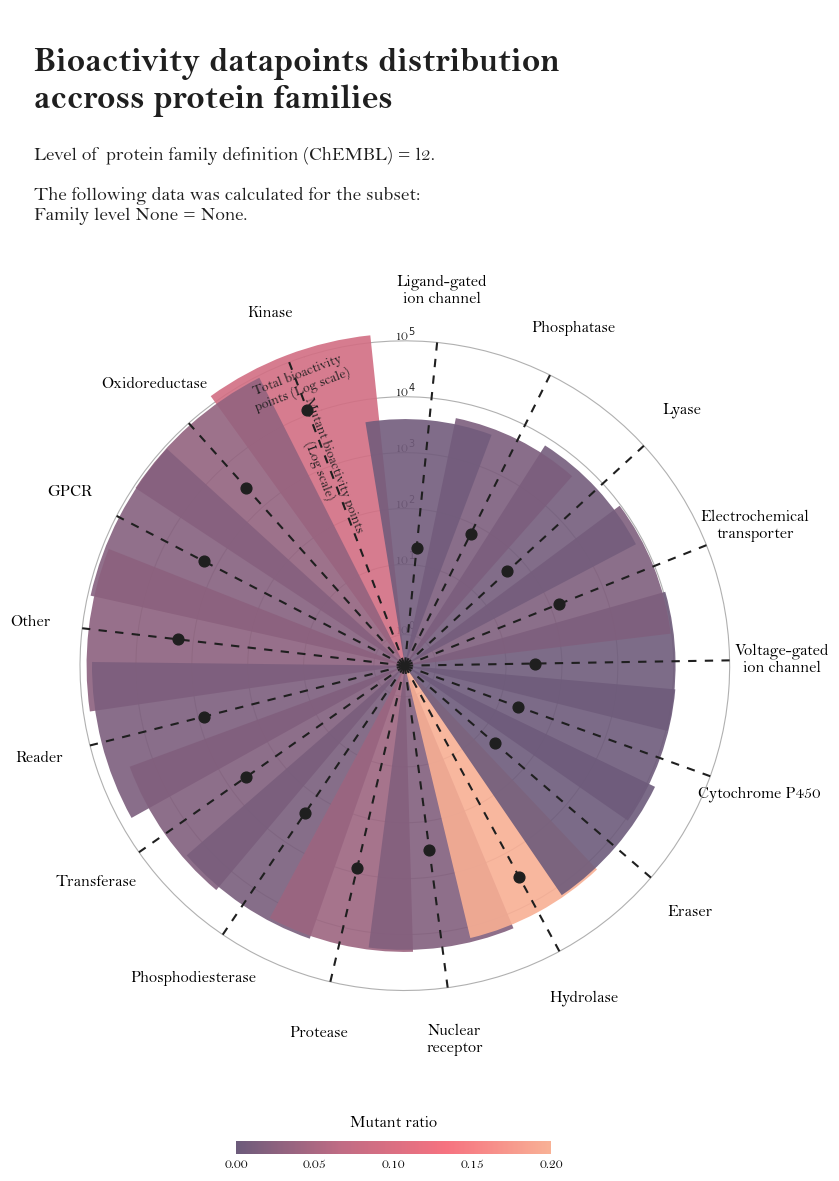

In [8]:
plot_circular_barplot_families(annotated_data_families, 'l2', output_dir, subset_level=None, subset_family=None,
                               save=False)

                               activity_mut  activity_all  mut_ratio
l4                                                                  
AGC protein kinase group               1375         10569   0.130097
Atypical protein kinase group             7          4478   0.001563
CAMK protein kinase group                 4           326   0.012270
CK1 protein kinase group                  8            42   0.190476
CMGC protein kinase group                92         18763   0.004903
Other protein kinase group              170         10283   0.016532
STE protein kinase group                 30          1388   0.021614
TK protein kinase group                5863         76056   0.077088
TKL protein kinase group               4562         13299   0.343033


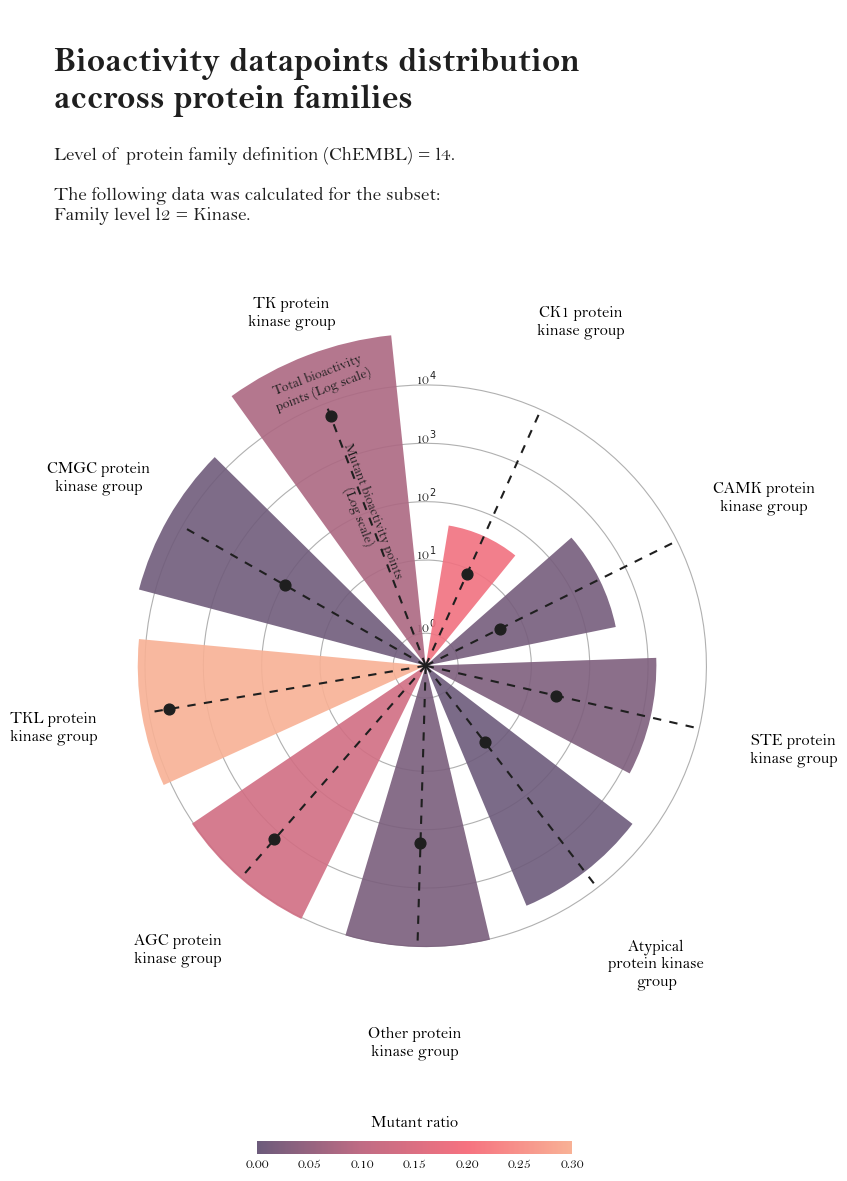

In [9]:
plot_circular_barplot_families(annotated_data_families, 'l4', output_dir, subset_level='l2', subset_family='Kinase',
                               save=False)

                                            activity_mut  activity_all  \
l4                                                                       
Chemokine receptor                                   191          3391   
Lipid-like ligand receptor (family A GPCR)            75         13986   
Monoamine receptor                                   334         30959   
Neurotransmitter receptor (family C GPCR)             26          1527   
Nucleotide-like receptor (family A GPCR)             215         10190   
Other                                                 29          1054   
Short peptide receptor (family A GPCR)               866         27764   

                                            mut_ratio  
l4                                                     
Chemokine receptor                           0.056326  
Lipid-like ligand receptor (family A GPCR)   0.005363  
Monoamine receptor                           0.010788  
Neurotransmitter receptor (family C GPCR)    0.017027

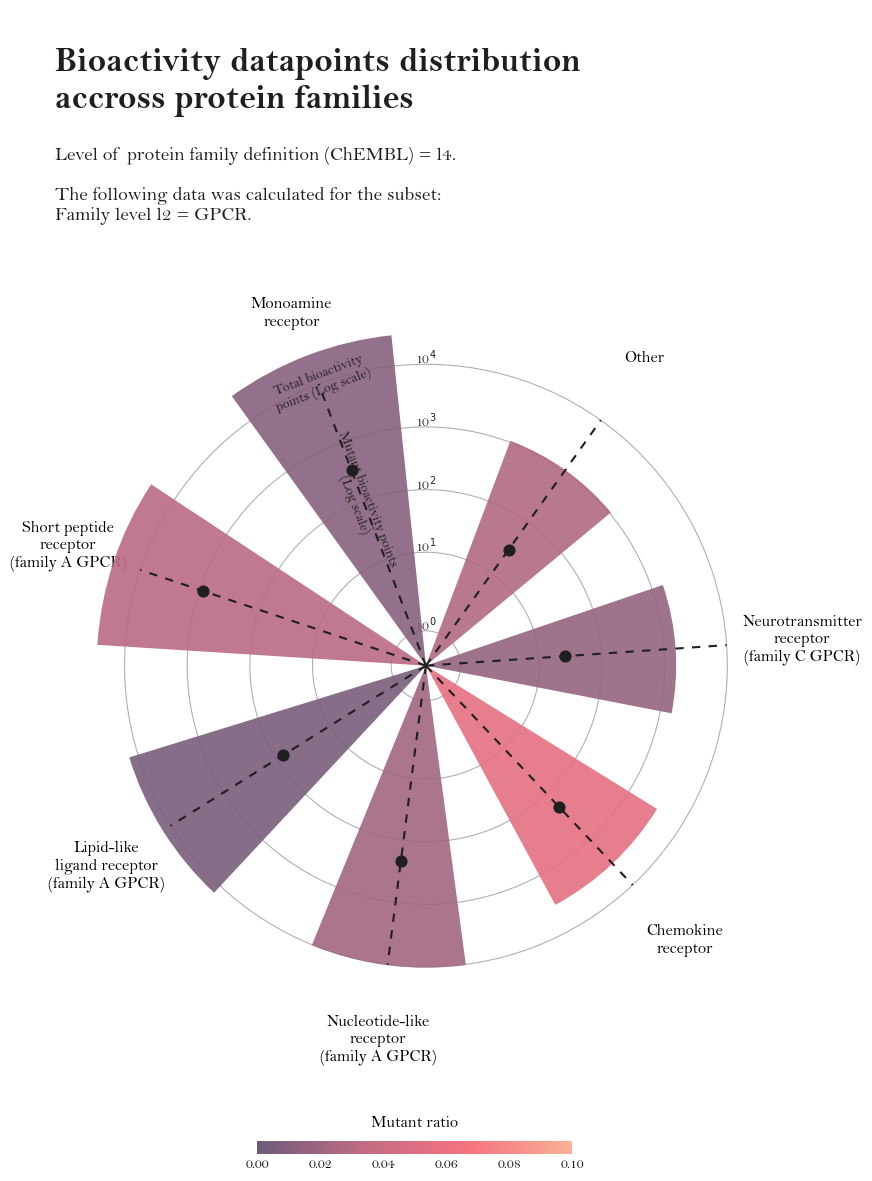

In [10]:
plot_circular_barplot_families(annotated_data_families, 'l4', output_dir, subset_level='l2', subset_family='GPCR',
                               save=False)

                                      activity_mut  activity_all  mut_ratio
l5                                                                         
Tyrosine protein kinase Abl family            1101          5033   0.218756
Tyrosine protein kinase Axl family               1           890   0.001124
Tyrosine protein kinase DDR family              26           284   0.091549
Tyrosine protein kinase EGFR family           2626         16071   0.163400
Tyrosine protein kinase Eph family               3           107   0.028037
Tyrosine protein kinase FGFR family            176          7749   0.022713
Tyrosine protein kinase Fak family              25          1621   0.015423
Tyrosine protein kinase JakB family            131          5989   0.021873
Tyrosine protein kinase Met family             129          4993   0.025836
Tyrosine protein kinase PDGFR family          1123          8176   0.137353
Tyrosine protein kinase Ret family             281          2123   0.132360
Tyrosine pro

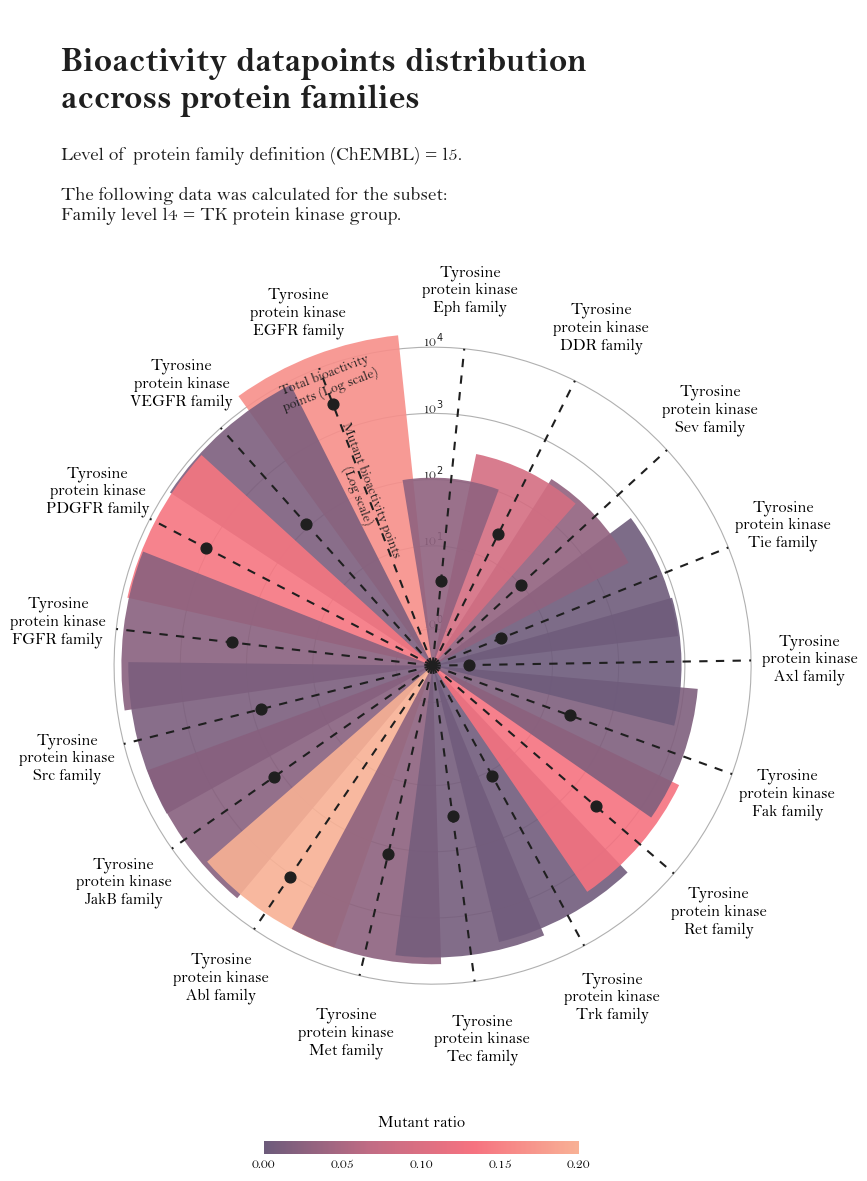

In [11]:
plot_circular_barplot_families(annotated_data_families, 'l5', output_dir, subset_level='l4', subset_family='TK protein kinase '
                                                                                               'group', save=False)

### Analysis of ChEMBL mutant annotation coverage per family

Read ChEMBL bioactivity data from annotation pipeline, containing new ("target_id") and old ("mutation") mutant
annotations.

In [12]:
# Read ChEMBL-only annotated bioactivity data for variants
chembl_annotated_data = chembl_annotation('31')
chembl_annotated_data

C:\Users\gorostiolam\AppData\Local\Continuum\anaconda3\envs\mutants-in-pcm\lib\site-packages\ipykernel_launcher.py:2: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  


,target_id,chembl_id,assay_id,activity_id,accession,pchembl_value,activity_comment,canonical_smiles,mutation,year,sequence,pchembl_value_Mean,Activity_class
0,A0A024AXB9_WT,CHEMBL1230673,[1986298],[20667385],A0A024AXB9,[6.37],[nan],CN[C@@H](C)C(=O)N[C@H](C(=O)N1CC[C@H](C)[C@H]1...,NaN,2020.0,AETDEDHAHWLEARMLLDNIYLQDGLIASLYRPEADKVAAIEGEFK...,6.370000,NaN
1,A0A024AXB9_WT,CHEMBL1332616,"[1986298, 1986301]","[20667410, 20667411]",A0A024AXB9,"[5.77, 6.22]","[nan, nan]",O=C1OC2(c3ccccc31)c1cc(I)c(O)c(I)c1Oc1c2cc(I)c...,NaN,2020.0,AETDEDHAHWLEARMLLDNIYLQDGLIASLYRPEADKVAAIEGEFK...,5.995000,NaN
2,A0A024AXB9_WT,CHEMBL151,[1855280],[19053938],A0A024AXB9,[4.28],[nan],O=c1cc(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,NaN,2020.0,AETDEDHAHWLEARMLLDNIYLQDGLIASLYRPEADKVAAIEGEFK...,4.280000,NaN
3,A0A024AXB9_WT,CHEMBL1535,[1986298],[20667415],A0A024AXB9,[4.04],[nan],CCN(CCO)CCCC(C)Nc1ccnc2cc(Cl)ccc12,NaN,2020.0,AETDEDHAHWLEARMLLDNIYLQDGLIASLYRPEADKVAAIEGEFK...,4.040000,NaN
4,A0A024AXB9_WT,CHEMBL164,"[1855280, 1855317, 1855317]","[19053935, 19053936, 19053937]",A0A024AXB9,"[4.66, 5.89, 6.1]","[nan, nan, nan]",O=c1c(O)c(-c2cc(O)c(O)c(O)c2)oc2cc(O)cc(O)c12,NaN,2020.0,AETDEDHAHWLEARMLLDNIYLQDGLIASLYRPEADKVAAIEGEFK...,5.550000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2565038,nan_WT,CHEMBL529,"[582849, 582849, 582849]","[2702686, 2702686, 2702686]",NaN,"[6.52, 6.52, 6.52]","[nan, nan, nan]",CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,NaN,2009.0,UGCCUGGCGGCCGUAGCGCGGUGGUCCCACCUGACCCCAUGCCGAA...,6.520000,NaN
2565039,nan_WT,CHEMBL532,"[576183, 576183, 576183, 576182, 576182, 57618...","[2663798, 2663798, 2663798, 2663799, 2663799, ...",NaN,"[7.54, 7.54, 7.54, 7.96, 7.96, 7.96, 5.72, 5.7...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,NaN,2007.0,UGCCUGGCGGCCGUAGCGCGGUGGUCCCACCUGACCCCAUGCCGAA...,6.418889,NaN
2565040,nan_WT,CHEMBL553222,"[582849, 582849, 582849]","[2702683, 2702683, 2702683]",NaN,"[7.0, 7.0, 7.0]","[nan, nan, nan]",CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,NaN,2009.0,UGCCUGGCGGCCGUAGCGCGGUGGUCCCACCUGACCCCAUGCCGAA...,7.000000,NaN
2565041,nan_WT,CHEMBL557931,"[582849, 582849, 582849]","[2702682, 2702682, 2702682]",NaN,"[5.89, 5.89, 5.89]","[nan, nan, nan]",CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,NaN,2009.0,UGCCUGGCGGCCGUAGCGCGGUGGUCCCACCUGACCCCAUGCCGAA...,5.890000,NaN


In [13]:
chembl_annotated_data_families = link_bioactivity_to_family(chembl_annotated_data, chembl_families)
chembl_annotated_data_families

,target_id,chembl_id,assay_id,activity_id,accession,pchembl_value,activity_comment,canonical_smiles,mutation,year,sequence,pchembl_value_Mean,Activity_class,l1,l2,l3,l4,l5
0,A0A024AXB9_WT,CHEMBL1230673,[1986298],[20667385],A0A024AXB9,[6.37],[nan],CN[C@@H](C)C(=O)N[C@H](C(=O)N1CC[C@H](C)[C@H]1...,NaN,2020.0,AETDEDHAHWLEARMLLDNIYLQDGLIASLYRPEADKVAAIEGEFK...,6.370000,NaN,Other,Other,Other,Other,Other
1,A0A024AXB9_WT,CHEMBL1332616,"[1986298, 1986301]","[20667410, 20667411]",A0A024AXB9,"[5.77, 6.22]","[nan, nan]",O=C1OC2(c3ccccc31)c1cc(I)c(O)c(I)c1Oc1c2cc(I)c...,NaN,2020.0,AETDEDHAHWLEARMLLDNIYLQDGLIASLYRPEADKVAAIEGEFK...,5.995000,NaN,Other,Other,Other,Other,Other
2,A0A024AXB9_WT,CHEMBL151,[1855280],[19053938],A0A024AXB9,[4.28],[nan],O=c1cc(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,NaN,2020.0,AETDEDHAHWLEARMLLDNIYLQDGLIASLYRPEADKVAAIEGEFK...,4.280000,NaN,Other,Other,Other,Other,Other
3,A0A024AXB9_WT,CHEMBL1535,[1986298],[20667415],A0A024AXB9,[4.04],[nan],CCN(CCO)CCCC(C)Nc1ccnc2cc(Cl)ccc12,NaN,2020.0,AETDEDHAHWLEARMLLDNIYLQDGLIASLYRPEADKVAAIEGEFK...,4.040000,NaN,Other,Other,Other,Other,Other
4,A0A024AXB9_WT,CHEMBL164,"[1855280, 1855317, 1855317]","[19053935, 19053936, 19053937]",A0A024AXB9,"[4.66, 5.89, 6.1]","[nan, nan, nan]",O=c1c(O)c(-c2cc(O)c(O)c(O)c2)oc2cc(O)cc(O)c12,NaN,2020.0,AETDEDHAHWLEARMLLDNIYLQDGLIASLYRPEADKVAAIEGEFK...,5.550000,NaN,Other,Other,Other,Other,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2565038,nan_WT,CHEMBL529,"[582849, 582849, 582849]","[2702686, 2702686, 2702686]",NaN,"[6.52, 6.52, 6.52]","[nan, nan, nan]",CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,NaN,2009.0,UGCCUGGCGGCCGUAGCGCGGUGGUCCCACCUGACCCCAUGCCGAA...,6.520000,NaN,Other,Other,Other,Other,Other
2565039,nan_WT,CHEMBL532,"[576183, 576183, 576183, 576182, 576182, 57618...","[2663798, 2663798, 2663798, 2663799, 2663799, ...",NaN,"[7.54, 7.54, 7.54, 7.96, 7.96, 7.96, 5.72, 5.7...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,NaN,2007.0,UGCCUGGCGGCCGUAGCGCGGUGGUCCCACCUGACCCCAUGCCGAA...,6.418889,NaN,Other,Other,Other,Other,Other
2565040,nan_WT,CHEMBL553222,"[582849, 582849, 582849]","[2702683, 2702683, 2702683]",NaN,"[7.0, 7.0, 7.0]","[nan, nan, nan]",CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,NaN,2009.0,UGCCUGGCGGCCGUAGCGCGGUGGUCCCACCUGACCCCAUGCCGAA...,7.000000,NaN,Other,Other,Other,Other,Other
2565041,nan_WT,CHEMBL557931,"[582849, 582849, 582849]","[2702682, 2702682, 2702682]",NaN,"[5.89, 5.89, 5.89]","[nan, nan, nan]",CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,NaN,2009.0,UGCCUGGCGGCCGUAGCGCGGUGGUCCCACCUGACCCCAUGCCGAA...,5.890000,NaN,Other,Other,Other,Other,Other


Plot circualr barplots

                      mut_new  mut_all  mut_ratio
l1                                               
Enzyme                   4323    20633   0.209519
Epigenetic regulator      108     1073   0.100652
Ion channel                 9      184   0.048913
Membrane receptor         392     1756   0.223235
Other                     105      588   0.178571
Transcription factor      166      422   0.393365
Transporter                 3      157   0.019108


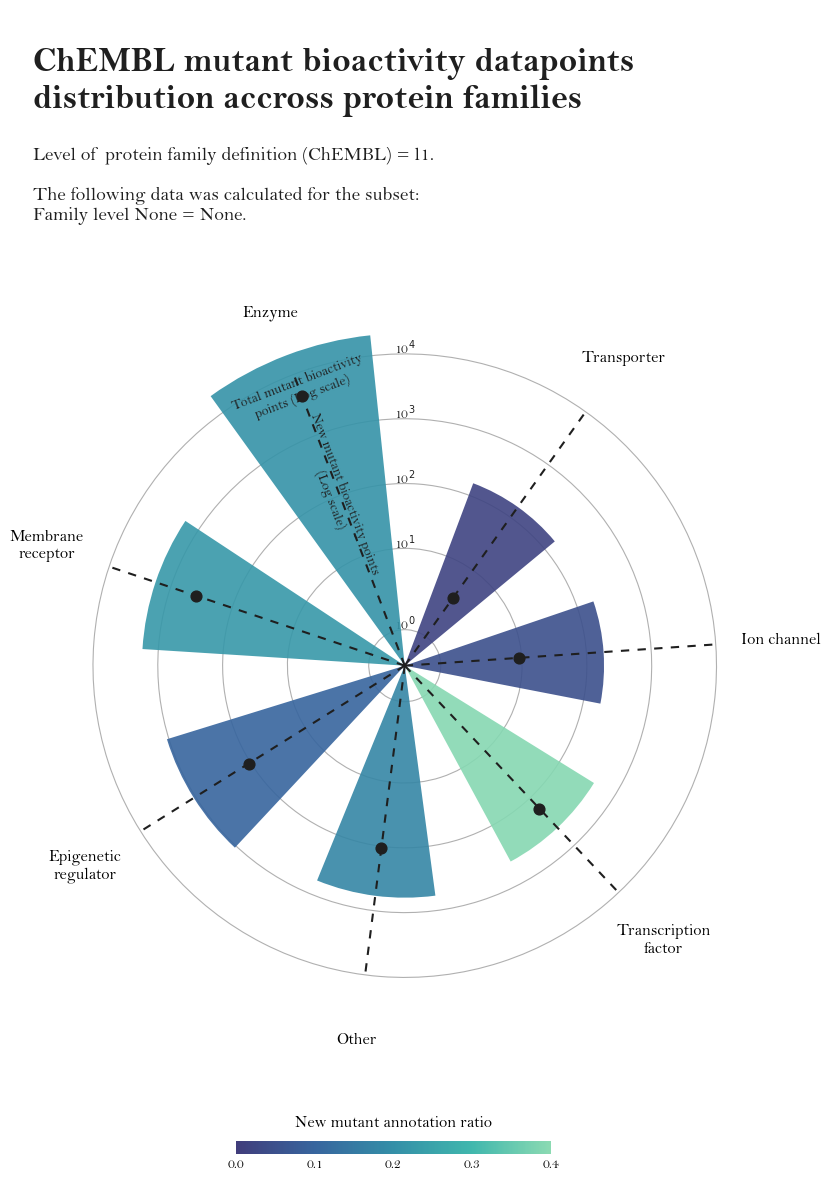

In [14]:
plot_circular_barplot_families_newannotations(chembl_annotated_data_families, 'l1', output_dir, save=False)

                             mut_new  mut_all  mut_ratio
l2                                                      
Cytochrome P450                 23.0       27   0.851852
Eraser                           5.0       21   0.238095
GPCR                           392.0     1756   0.223235
Hydrolase                      310.0     3206   0.096694
Kinase                        2511.0    11745   0.213793
Ligand-gated ion channel         3.0       20   0.150000
Nuclear receptor               166.0      335   0.495522
Other                          468.0     2045   0.228851
Oxidoreductase                 797.0     3029   0.263123
Phosphatase                     20.0       67   0.298507
Phosphodiesterase              202.0      237   0.852321
Protease                       121.0      889   0.136108
Reader                          26.0      833   0.031212
Transferase                     62.0      378   0.164021
Electrochemical transporter      NaN      143   0.000000
Lyase                          

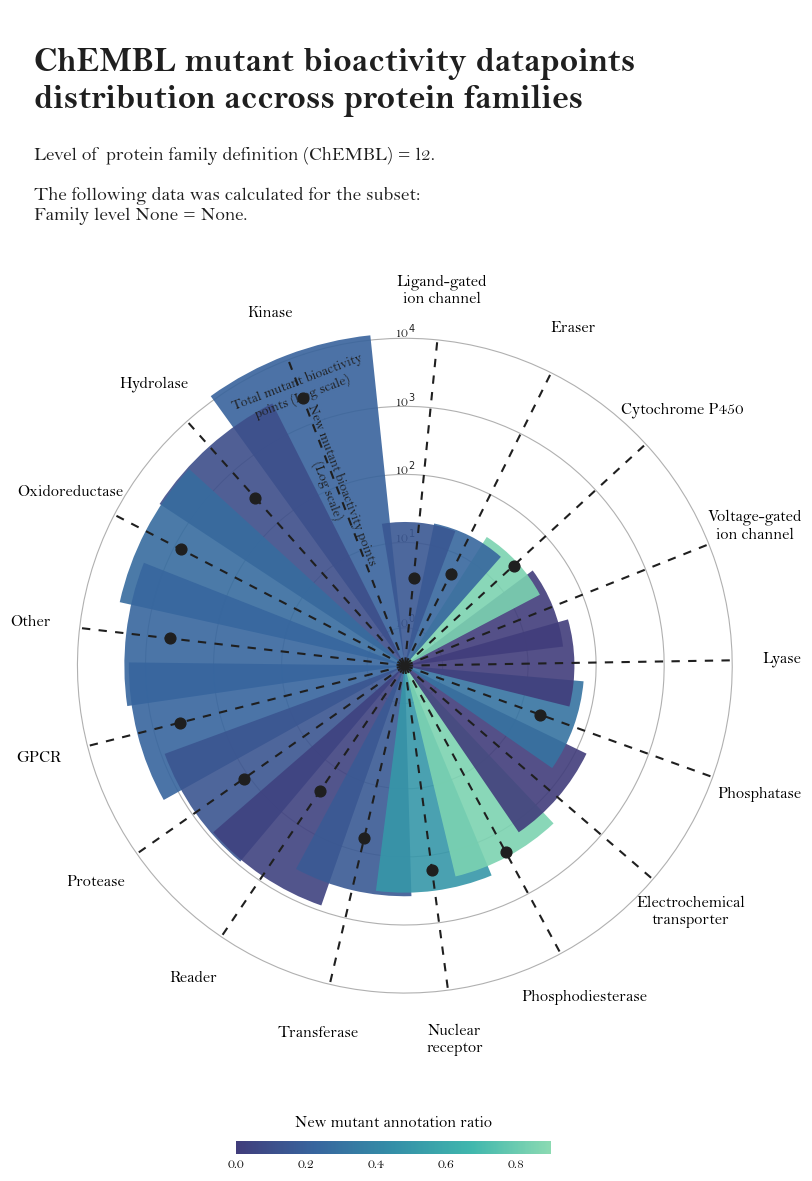

In [15]:
plot_circular_barplot_families_newannotations(chembl_annotated_data_families, 'l2', output_dir, save=False)

                               mut_new  mut_all  mut_ratio
l4                                                        
AGC protein kinase group        1302.0     1442   0.902913
CAMK protein kinase group          1.0        4   0.250000
CMGC protein kinase group         72.0       92   0.782609
Other protein kinase group        28.0      140   0.200000
STE protein kinase group           3.0       31   0.096774
TK protein kinase group          280.0     5408   0.051775
TKL protein kinase group         825.0     4613   0.178842
Atypical protein kinase group      NaN        7   0.000000
CK1 protein kinase group           NaN        8   0.000000


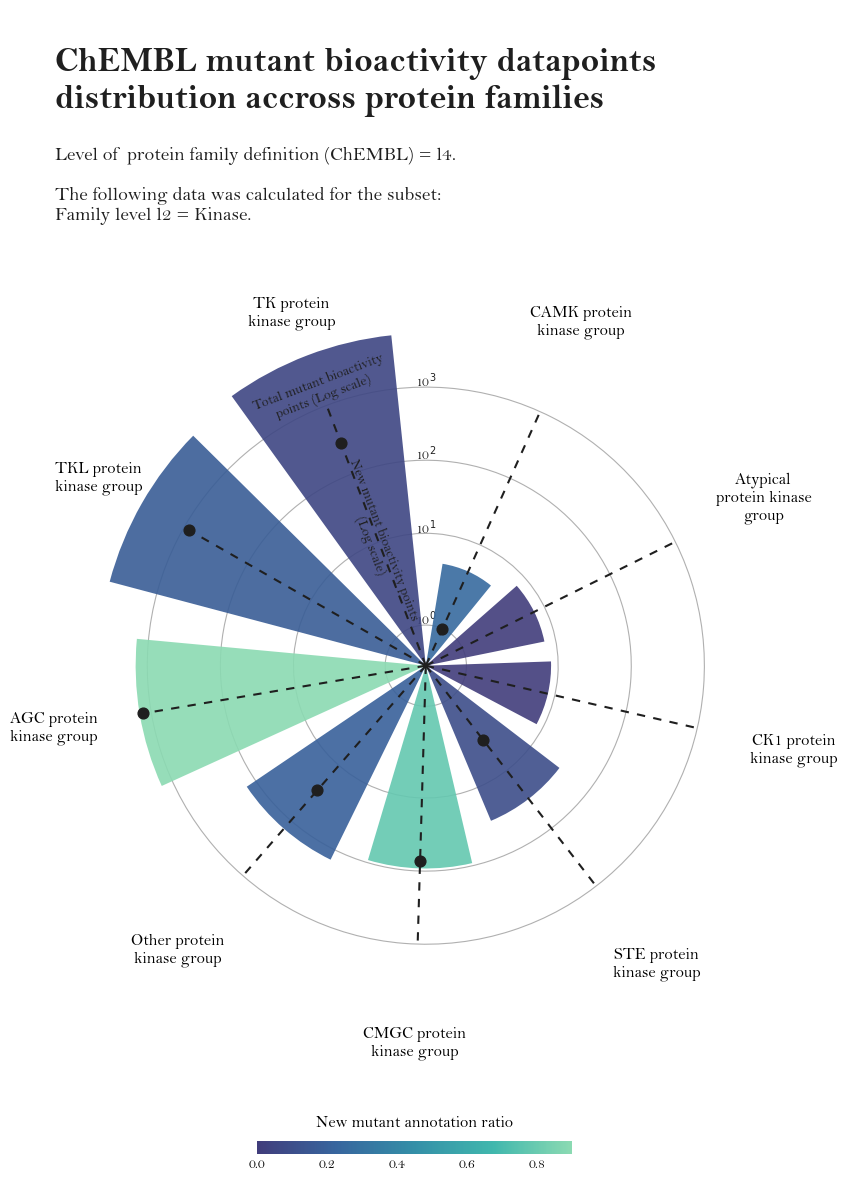

In [16]:
plot_circular_barplot_families_newannotations(chembl_annotated_data_families, 'l4', output_dir, subset_level='l2',
                                              subset_family='Kinase', save=False)

                                            mut_new  mut_all  mut_ratio
l4                                                                     
Lipid-like ligand receptor (family A GPCR)     44.0       75   0.586667
Monoamine receptor                            157.0      336   0.467262
Nucleotide-like receptor (family A GPCR)       43.0      215   0.200000
Short peptide receptor (family A GPCR)        148.0      884   0.167421
Chemokine receptor                              NaN      191   0.000000
Neurotransmitter receptor (family C GPCR)       NaN       26   0.000000
Other                                           NaN       29   0.000000


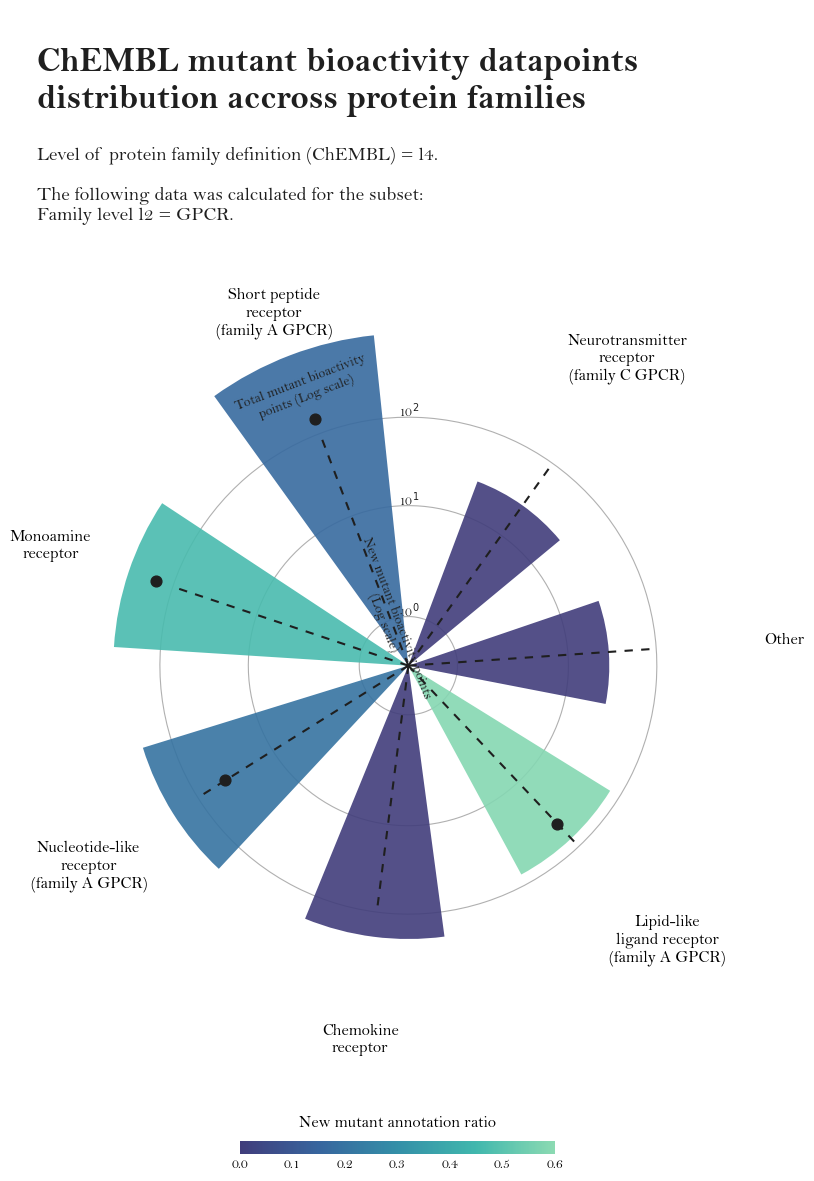

In [17]:
plot_circular_barplot_families_newannotations(chembl_annotated_data_families, 'l4', output_dir, subset_level='l2',
                                              subset_family='GPCR', save=False)

                                      mut_new  mut_all  mut_ratio
l5                                                               
Tyrosine protein kinase Abl family       27.0      943   0.028632
Tyrosine protein kinase EGFR family     169.0     2551   0.066249
Tyrosine protein kinase FGFR family      46.0      144   0.319444
Tyrosine protein kinase Fak family       25.0       25   1.000000
Tyrosine protein kinase Ret family        3.0      255   0.011765
Tyrosine protein kinase Src family       10.0       72   0.138889
Tyrosine protein kinase Axl family        NaN        1   0.000000
Tyrosine protein kinase DDR family        NaN       26   0.000000
Tyrosine protein kinase Eph family        NaN        4   0.000000
Tyrosine protein kinase JakB family       NaN      131   0.000000
Tyrosine protein kinase Met family        NaN      115   0.000000
Tyrosine protein kinase PDGFR family      NaN      968   0.000000
Tyrosine protein kinase Sev family        NaN       10   0.000000
Tyrosine p

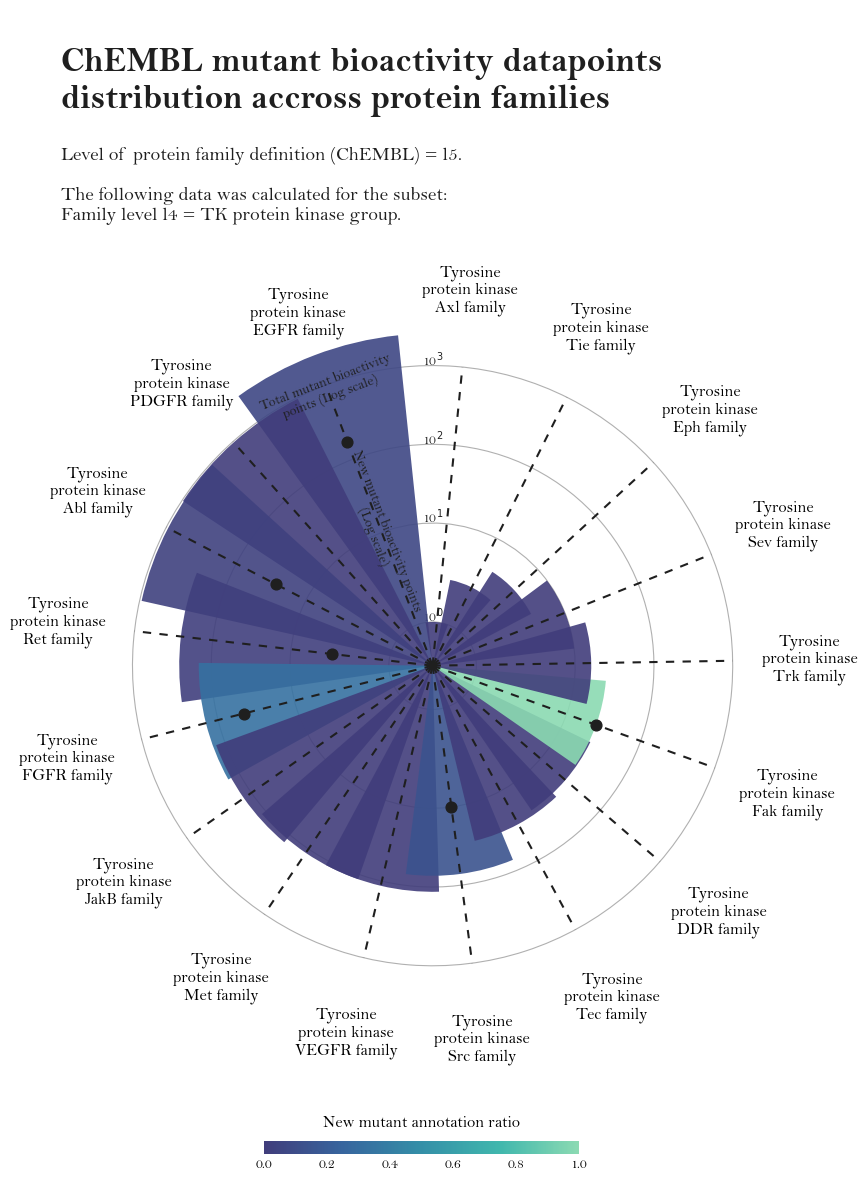

In [18]:
plot_circular_barplot_families_newannotations(chembl_annotated_data_families, 'l5', output_dir, subset_level='l4',
                                              subset_family='TK protein kinase group', save=False)